In [79]:
!pip install wordcloud
import urllib.request
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('E:\Courses\COURSERA\IBM Data Analyst Professional Certificate\IBM Data Analyst Capstone Project\W-5\CSV\m5_survey_data_technologies_normalised.csv')
df

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
3,4.0,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
4,4.0,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74585,25142.0,Go,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74586,25142.0,HTML/CSS,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74587,25142.0,PHP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74588,25142.0,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
ranked_platforms = df['PlatformWorkedWith'].value_counts()
print(ranked_platforms)

Linux                    5811
Windows                  5563
Docker                   4378
AWS                      3588
Slack                    2786
MacOS                    2718
Android                  2693
Microsoft Azure          1711
Raspberry Pi             1614
WordPress                1490
Google Cloud Platform    1454
iOS                      1438
Heroku                   1268
Kubernetes               1238
Arduino                   914
Other(s):                 329
IBM Cloud or Watson       215
Name: PlatformWorkedWith, dtype: int64


In [90]:
import tabulate
top_languages = df['PlatformWorkedWith'].value_counts().head(10)
# Create a new DataFrame with the top languages and their counts
top_languages_df = pd.DataFrame({'Platform': top_languages.index, 'Count': top_languages.values})
top_languages_df.index += 1
print(tabulate.tabulate(top_languages_df.reset_index(), headers=["Platform", "Count"], tablefmt="pipe", showindex=False))

|    | Platform        |   Count |
|---:|:----------------|--------:|
|  1 | Linux           |    5811 |
|  2 | Windows         |    5563 |
|  3 | Docker          |    4378 |
|  4 | AWS             |    3588 |
|  5 | Slack           |    2786 |
|  6 | MacOS           |    2718 |
|  7 | Android         |    2693 |
|  8 | Microsoft Azure |    1711 |
|  9 | Raspberry Pi    |    1614 |
| 10 | WordPress       |    1490 |


In [82]:
platforms = ranked_platforms.dropna() # filter out missing values
platforms_str = " ".join(platforms.astype(str))
print(platforms_str)

5811 5563 4378 3588 2786 2718 2693 1711 1614 1490 1454 1438 1268 1238 914 329 215


In [83]:
# Extract the top 10 most common platforms
platform_counts = platforms.value_counts().head(3)
top_platforms = platform_counts.index.tolist()
# Set the first 10 words as stopwords and adjust max_words
stopwords = set(STOPWORDS)
for word in top_platforms:
    stopwords.add(word)
print(word)

329


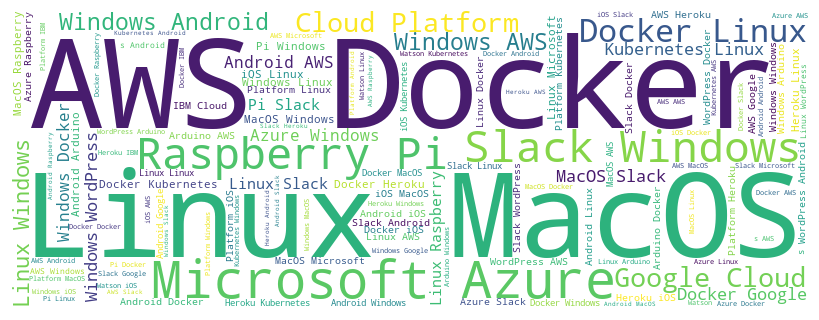

In [89]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [87]:
print(platforms)

Linux                    5811
Windows                  5563
Docker                   4378
AWS                      3588
Slack                    2786
MacOS                    2718
Android                  2693
Microsoft Azure          1711
Raspberry Pi             1614
WordPress                1490
Google Cloud Platform    1454
iOS                      1438
Heroku                   1268
Kubernetes               1238
Arduino                   914
Other(s):                 329
IBM Cloud or Watson       215
Name: PlatformWorkedWith, dtype: int64


CSV from df filtered two column for ranked PlatformWorkedWith and responders number

In [88]:
platforms = df["PlatformWorkedWith"]
platforms = platforms.dropna() # filter out missing values

# Count the number of responders for each platform
platform_counts = platforms.value_counts().sort_values(ascending=False)

# Create a new DataFrame with the platform names and responder counts
df_counts = pd.DataFrame({
    "PlatformWorkedWith": platform_counts.index,
    "RespondersCount": platform_counts.values
})
import tempfile
tempdir = tempfile.gettempdir()
df_counts.to_csv(tempdir + '/ranked_platforms.csv', index=False)
from IPython.display import FileLink
FileLink(tempdir + '/ranked_platforms.csv')

C:\Users\Boris\AppData\Local\Temp\ranked_platforms.csv